**Importing libraries**

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
car_data=pd.read_csv("../input/vehicle-dataset-from-cardekho/car data.csv")

**Data Pre-processing**

In [4]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
car_data.shape

(301, 9)

In [6]:
car_data=pd.get_dummies(car_data,columns=['Fuel_Type','Seller_Type','Transmission'],drop_first=True)

In [7]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,1,0,1
1,sx4,2013,4.75,9.54,43000,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,1,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,1,0,1
4,swift,2014,4.60,6.87,42450,0,1,0,0,1


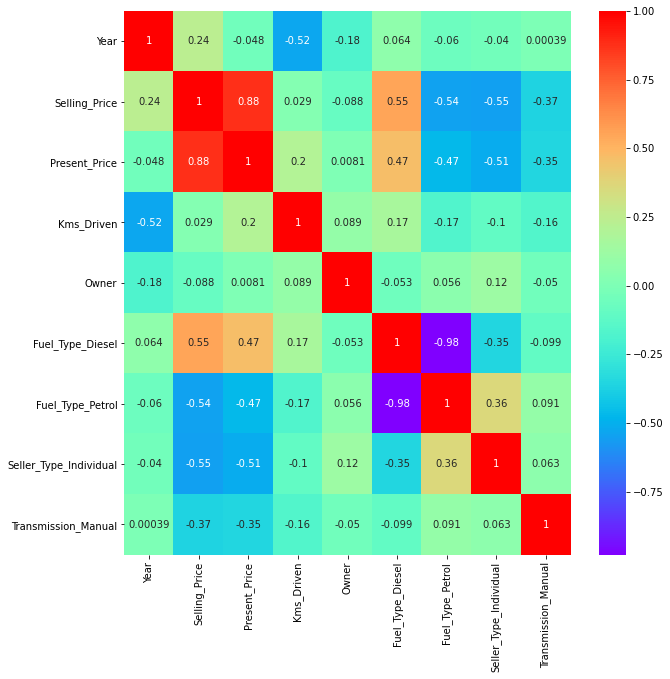

In [8]:
correlations=car_data.corr()
indx=correlations.index
plt.figure(figsize=(10,10))
sns.heatmap(car_data[indx].corr(),annot=True,cmap="rainbow")

In [9]:
car_train,car_test=train_test_split(car_data,test_size=0.2,random_state=100)

In [10]:
scaler= StandardScaler()
var=['Selling_Price','Present_Price','Kms_Driven']
car_train[var]=scaler.fit_transform(car_train[var])
car_test[var]=scaler.transform(car_test[var])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

**Dividing the dataset into train & test**

In [11]:
X_train=car_train.drop(columns=['Car_Name','Selling_Price'],axis=1)
X_test=car_test.drop(columns=['Car_Name','Selling_Price'],axis=1)
y_train=car_train['Selling_Price']
y_test=car_test['Selling_Price']

**Performing Linear Regression**

In [12]:
regressor=LinearRegression()
regressor=regressor.fit(X_train,y_train)

In [13]:
y_pred=regressor.predict(X_test)

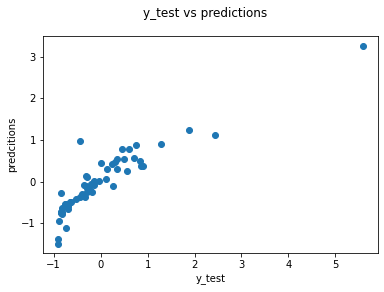

In [14]:
fig = plt.figure()
# Plot-label
fig.suptitle('y_test vs predictions')

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predcitions')
plt.scatter(y_test,y_pred)

In [15]:
mean_squared_error(y_test,y_pred)

0.21174768834350252

In [16]:
r2_score(y_test,y_pred)

0.7881190801068392